<a href="https://colab.research.google.com/github/AhmedV100/Imperium/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farida Mohamed

ID:55-6462

Tutorial: t-4

---

Name:Shahd Mostafa

ID:55-2484

Tutorial:t-4

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

This code block imports a few more useful Python libraries for the purpose of performing data analysis and visualization: pandas for data manipulation, numpy for computations, matplotlib, and seaborn for plotting all kinds of graphs. Then, it links to a telecom churn dataset located at a certain URL and loads it into a DataFrame referred to as df, subsequently presenting the first several observations of the obtained data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use("seaborn-v0_8")
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In essence, df is just a variable which we use to hold the dataset we have, in our case a table which we have loaded from an online CSV file. In pandas, this structure is known as a DataFrame and it is quite convenient since it allows us to view the data and even manipulate it with ease.

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


df.head() is a command that shows the first few rows of the data in our DataFrame, df. It’s helpful because it gives us a quick look at what the data looks like without having to scroll through the whole thing.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


 this is a command that shows the last few rows of the DataFrame. It’s useful for checking the end of the dataset, which can help us see if there are any issues or patterns in the last rows of data.

In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),$105.65/m,$6844.5,No



this code gives a summary of the DataFrame, df, including the number of rows, columns, column names, data types, and the number of non-null values in each column. It’s a quick way to understand the structure of the data and check for any missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

this command provides summary statistics for every column in the DataFrame, df, including both numerical and categorical columns. It’s helpful for getting a quick overview of things like mean, count, unique values, and other statistical details for each column.

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,61,8,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 here the code checks for missing (NaN) values in each column of the DataFrame, df, and counts them up. print(missing_values) then displays the total number of missing values per column, making it easy to spot where data might be incomplete.

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64


 this piece of code shows the data types of each column in the DataFrame, df, such as whether the values are integers, floats, objects (strings), etc. This is useful for understanding what kind of data each column holds, which can affect how we analyze or process the data.

In [ ]:
print(df.dtypes)

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object


This code finds all the unique values in the 'PaymentMethod' column of the DataFrame, and stores them in unique_payment_methods. prints unique_payment_methods then displays these unique payment methods, letting us see the different payment options used in the dataset.

In [ ]:
# Get unique payment methods in the 'PaymentMethod' column
unique_payment_methods = df['PaymentMethod'].unique()

# Display the unique payment methods
print(unique_payment_methods)

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Data Cleaning

This code first converts the 'MonthlyCharges' column in df to a string format, then extracts only the digits and decimal points from the values using a regular expression. After that, it converts the extracted values back into float format to ensure the column is ready for numerical analysis. This process cleans up the data by removing any non-numeric characters in the 'MonthlyCharges' column.

In [ ]:

df['MonthlyCharges'] = df['MonthlyCharges'].astype(str)  # Convert to string
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('([0-9.]+)', expand=False)  # Extract digits and dot
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)  # Convert back to float
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,$306.6,Yes


This code does the same thing as the previous one, but for the 'TotalCharges' column. It first converts 'TotalCharges' to a string, then extracts only the numeric values (digits and decimal points), and finally converts the extracted values back to float format. This helps clean the data by removing any non-numeric characters from the 'TotalCharges' column

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(str)  # Convert to string
df['TotalCharges'] = df['TotalCharges'].str.extract('([0-9.]+)', expand=False)  # Extract digits and dot
df['TotalCharges'] = df['TotalCharges'].astype(float)  # Convert back to float
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


This code removes the 'customerID' column from the DataFrame, df. The axis=1 part specifies that we want to drop a column (not a row), and after this, the DataFrame will no longer include the 'customerID' column.

In [ ]:
df = df.drop('customerID', axis=1)

This code checks for missing (NaN) values in the 'TotalCharges' column of the DataFrame, df, and counts how many there are using .isna().sum(). The result is then printed, showing the number of missing values in the 'TotalCharges' column.

In [ ]:
# Check for missing values (NaN) in 'TotalCharges' column
missing_count = df['TotalCharges'].isna().sum()
print(f"Number of missing values (NaN) in 'TotalCharges': {missing_count}")

Number of missing values (NaN) in 'TotalCharges': 852


This code replaces any missing values (NaN) in the 'TotalCharges' column with the product of the 'MonthlyCharges' and 'tenure' columns. After filling the missing values, it checks again for any remaining missing values in 'TotalCharges' and prints the updated count of missing values.

In [ ]:
# Replace missing values in 'TotalCharges' with the product of 'MonthlyCharges' and 'tenure'
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

# Check the result
missing_count_after = df['TotalCharges'].isna().sum()
print(f"Number of missing values in 'TotalCharges' after replacement: {missing_count_after}")


Number of missing values in 'TotalCharges' after replacement: 0



This  part of the code loops through all the columns in the DataFrame, df, that have an object data type (typically strings). For each of these columns, it prints the unique values in that column, helping to see all the different categories or entries for each categorical variable

In [ ]:
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print()



Unique values in 'gender':
['Female' 'Male']

Unique values in 'Partner':
['Yes' 'No']

Unique values in 'Dependents':
['No' 'Yes']

Unique values in 'PhoneService':
['No' 'Yes']

Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']

Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']

Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']

Unique values in 'StreamingTV':
['No' 'Yes' 'No internet service']

Unique values in 'StreamingMovies':
['No' 'Yes' 'No internet service']

Unique values in 'Contract':
['Month-to-month' 'One year' 'Two year']

Unique values in 'PaperlessBilling':
['Yes' 'No']

Unique values in 'PaymentMethod':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values in 'Ch

This code applies one-hot encoding to the specified categorical columns in the DataFrame, turning each unique category into a separate binary column 1 or 0. It drops the first category for each column to avoid the dummy variable trap multicollinearity and uses int8 to optimize memory usage. After encoding, it prints the column names and the shape of the DataFrame before and after the encoding, so you can compare the changes.

In [ ]:
 # Categorical columns to encode
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Apply one-hot encoding to the specified columns
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,  # Avoid dummy variable trap
                           dtype='int8')     # Optimize memory usage with int8

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n', df.columns.values)
print('\nNumber of rows and columns in the dataset before encoding:', df.shape)
print('\nColumns in data frame after encoding dummy variable:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset after encoding:', df_encode.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']

Number of rows and columns in the dataset before encoding: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'PaperlessBilling' 'MonthlyCharges' 'TotalCharges' 'Churn'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No int

This code applies label encoding to the specified columns in the df_encode DataFrame, turning categorical values into numeric codes. Each unique category in the listed columns like gender, Partner, Dependents is replaced with a corresponding integer code. After encoding, the updated DataFrame is displayed to verify the changes.








In [ ]:
# List of columns to label encode
columns_to_encode = ['gender', 'Partner','Dependents', 'PhoneService', 'PaperlessBilling','Churn']  # Replace with your column names

# Label encode each column
for col in columns_to_encode:
    df_encode[col] = df_encode[col].astype('category').cat.codes

# Display the DataFrame to verify
df_encode


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7028,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7029,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


This code prints the column names of the df_encode DataFrame, allowing you to see the list of all the columns after any transformations or encodings have been applied.








In [ ]:
print(df_encode.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


This code removes specific columns from the df_encode DataFrame, such as MultipleLines_No phone service, OnlineSecurity_No internet service, and others. These columns are dropped using axis=1 which refers to columns, likely because they represent redundant information or categories with no variation. The resulting DataFrame, f_encode, is now without these columns.

In [ ]:
df_encode = df_encode.drop(['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

This code first calculates the correlation matrix for all columns in the df_encode DataFrame, showing how strongly each feature is related to others. It then creates a heatmap of the correlation matrix using Seaborn, with visual adjustments like figure size, color scheme, and font size for better readability. The heatmap is annotated with correlation values, and the x and y labels are adjusted for clarity. After displaying the heatmap, it prints the top 10 most correlated features with Churn excluding Churn itself, helping to identify which features are most strongly associated with customer churn.








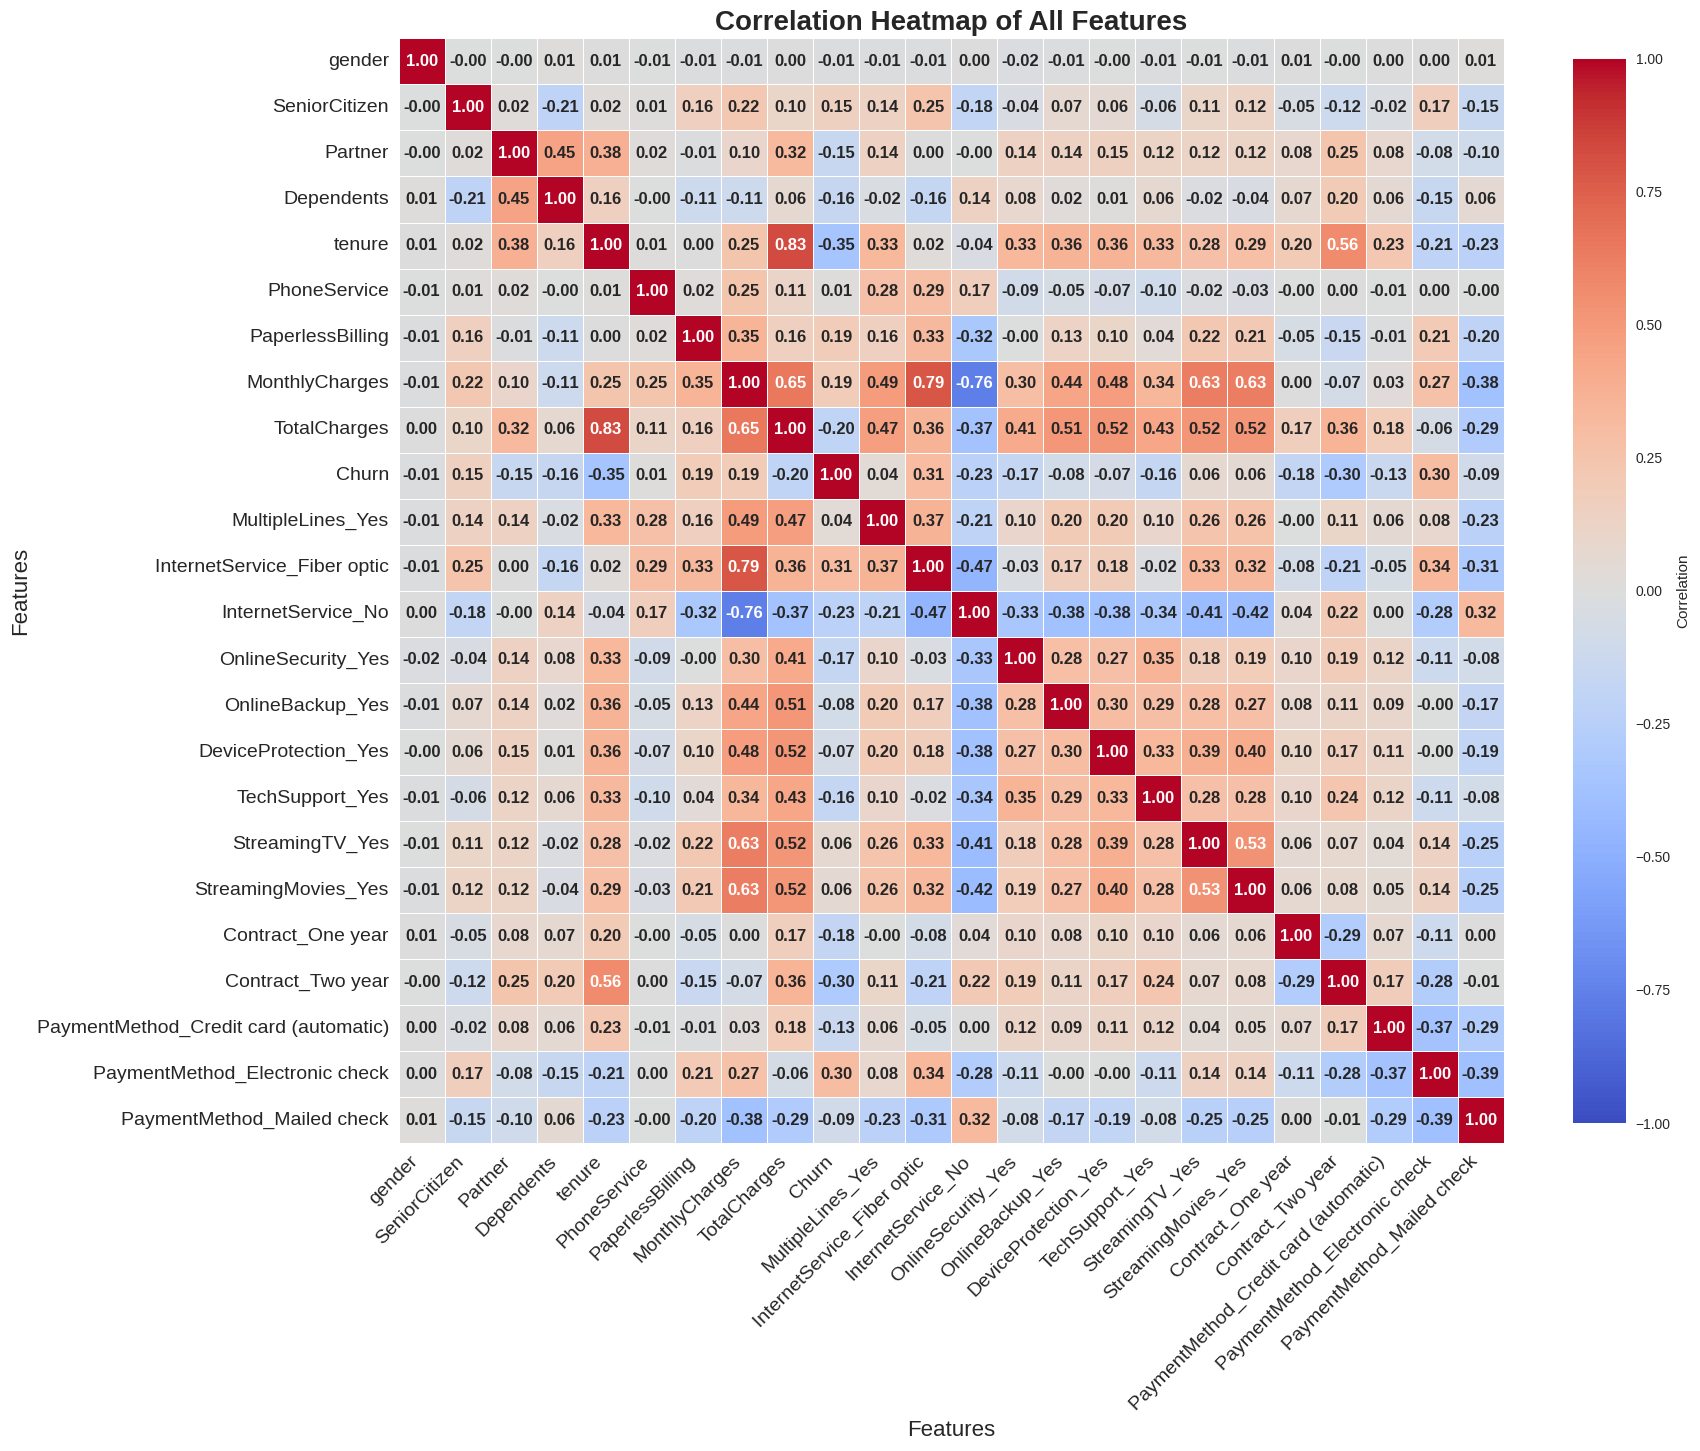

Most Correlated Features with Churn:
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService                      0.011691
gender                           -0.008545
Name: Churn, dtype: float64


In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_encode.corr()

# Create a heatmap for the entire correlation matrix
plt.figure(figsize=(18, 16))  # Further increase the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5,
            annot_kws={'size': 12, 'weight': 'bold'}, cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            cbar=True, square=True)

# Make the x and y labels more readable
plt.title('Correlation Heatmap of All Features', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x labels for readability
plt.yticks(rotation=0, fontsize=14)  # No rotation for y labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Print the most correlated features with 'Churn'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print("Most Correlated Features with Churn:")
print(correlation_with_churn[1:11])  # Skip 'Churn' itself


**Answer for Q1**: 1-InternetService_Fiber optic (0.307)
                   2-PaymentMethod_Electronic check (0.301)
                   3-MonthlyCharges (0.192)
                   4-PaperlessBilling_Yes (0.191)
                   5-SeniorCitzen

**Q2: Which payment method has the highest churn rate?**

**Visualization**

This code first filters the df DataFrame to only include rows where the Churn column is marked as Yes indicating churn. It then groups the data by the PaymentMethod column and counts the number of churn occurrences for each payment method. The counts are sorted in descending order and visualized using a bar plot, with payment methods on the x-axis and churn counts on the y-axis. The plot's appearance is adjusted with a title, axis labels, and rotated x-axis labels for better readability.

<ipython-input-38-e09f9f1b3efb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_churn_count_sorted.index, y=payment_churn_count_sorted.values, palette='viridis')


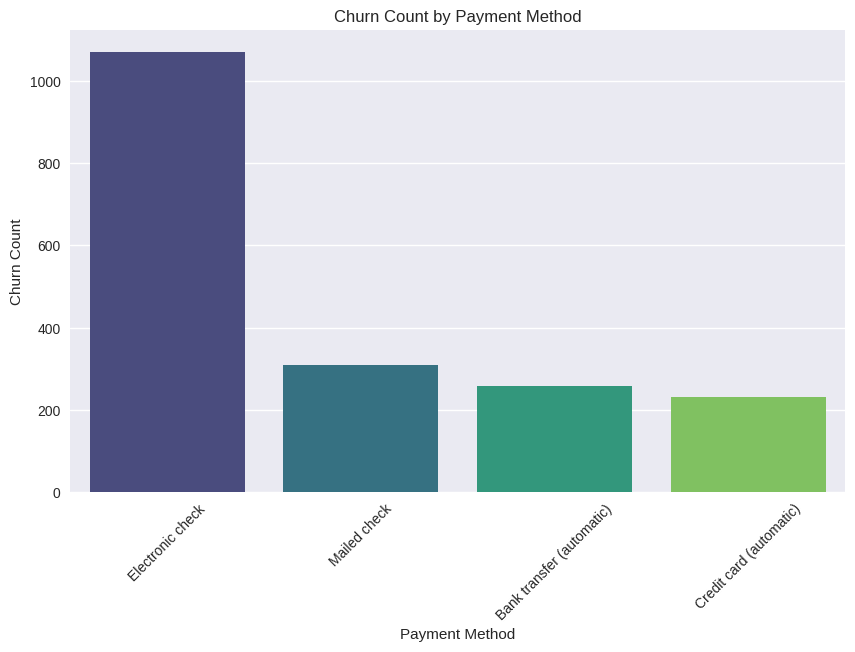

In [ ]:
# Group by PaymentMethod and calculate the churn count
payment_churn_count = df[df['Churn'] == 'Yes'].groupby('PaymentMethod').size()

# Sort the payment methods by churn count (optional)
payment_churn_count_sorted = payment_churn_count.sort_values(ascending=False)

# Create a bar plot to visualize the churn count for each payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_churn_count_sorted.index, y=payment_churn_count_sorted.values, palette='viridis')
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')
plt.xticks(rotation=45)
plt.show()




```
```

**Answer for Q2**: The payment method with the highest churn rate is Electronic Check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

This code first filters the df_encode DataFrame to include only customers who have churned Churn == 1. It then calculates the 25th, 50th media, and 75th percentiles of the tenure the number of months the customer has been with the company for these churned customers. After printing these percentiles, it creates a histogram to show the distribution of tenure for the churned customers. The histogram includes vertical lines at the calculated percentiles, with each line labeled for clarity, and the plot is customized with a title, axis labels, and a legend for easy interpretation.

Percentiles for Churned Customers:
25th percentile: 2.0 months
50th percentile (Median): 10.0 months
75th percentile: 29.0 months


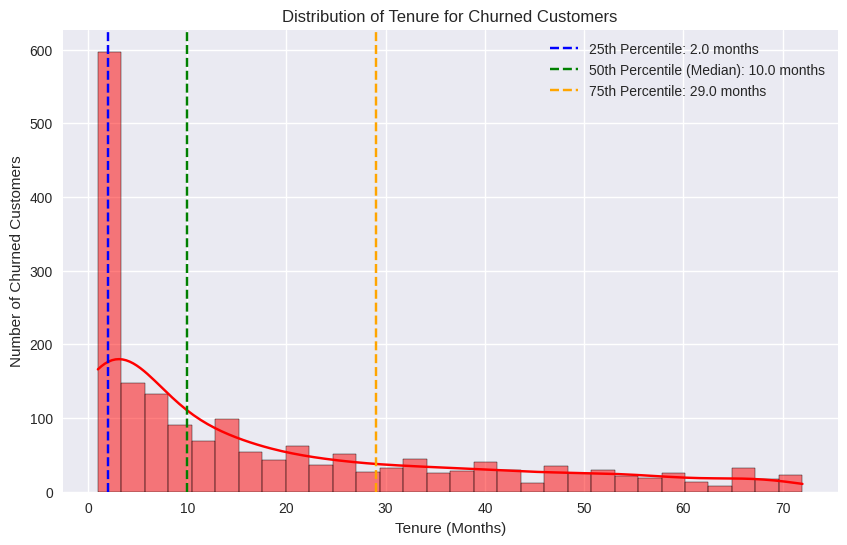

In [ ]:




# Filter customers who have churned (Churn = 1)
churned_customers = df_encode[df_encode['Churn'] == 1]

# Calculate the 25%, 50%, and 75% percentiles for the 'tenure' of churned customers
percentiles = churned_customers['tenure'].quantile([0.25, 0.5, 0.75])

# Print the percentiles
print("Percentiles for Churned Customers:")
print(f"25th percentile: {percentiles[0.25]} months")
print(f"50th percentile (Median): {percentiles[0.5]} months")
print(f"75th percentile: {percentiles[0.75]} months")

# Plotting the distribution of tenure for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], kde=True, color='red', bins=30)

# Add vertical lines for the percentiles
plt.axvline(percentiles[0.25], color='blue', linestyle='--', label=f'25th Percentile: {percentiles[0.25]:.1f} months')
plt.axvline(percentiles[0.5], color='green', linestyle='--', label=f'50th Percentile (Median): {percentiles[0.5]:.1f} months')
plt.axvline(percentiles[0.75], color='orange', linestyle='--', label=f'75th Percentile: {percentiles[0.75]:.1f} months')

# Labels and title
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Churned Customers')
plt.legend()
plt.show()


**Answer for Q3**:The percentiles for churned customers provide insight into the distribution of how long customers typically stay before churning:

25th percentile: 2.0 months – This means that 25% of the customers who churned did so within the first 2 months of their subscription.
50th percentile (Median): 10.0 months – The median indicates that 50% of churned customers left before reaching the 10-month mark, and 50% stayed longer than 10 months.
75th percentile: 29.0 months – This means that 75% of churned customers left by the 29-month mark, while 25% stayed longer than 29 months.
Interpretation:
On average, customers who churn tend to leave relatively early in their subscription period.

A significant portion (25%) churn within the first 2 months.
By the 10-month mark, half of the churned customers have already left.
A smaller percentage (25%) stay for more than 2 years before deciding to churn.
This suggests that most customers churn early in their subscription, and companies may want to focus on retaining customers in the first few months to improve customer lifetime.

## Data Preparation for Modelling

This code splits the df_encode DataFrame into features X and the target variable y. The Churn column is dropped from X the features, and y contains only the Churn column. Then, the data is split into training and testing sets using train_test_split, with 30% of the data reserved for testing test_size=0.3. The split is done randomly, but with a fixed random seed random_state=42 to ensure reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('Churn', axis=1)
y = df_encode['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

This code initializes a decision tree classifier tree_clf from scikit-learn and sets a random seed random_state=42 for reproducibility. It then trains the model on the training data X_train and y_train using the .fit() method, allowing the decision tree to learn the relationship between the features and the target variable Churn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

This code installs the graphviz package on the  system using the apt-get package manager. The -y flag automatically confirms the installation, so we don't need to manually approve it. graphviz is often used for visualizing decision trees and other graphs.

In [ ]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


This code installs the graphviz package using pip in Google Colab, which is necessary for visualizing decision trees. It imports the required libraries and uses export_graphviz to generate a dot format representation of the trained decision tree model tree_clf. The dot_data includes feature names, class names No for non-churn and Yes for churn , and styling options for the graph like coloring and rounded corners. It then creates a graph from this dot_data using graphviz.Source and displays the graph. The graph can also be exported

In [ ]:
#This code works on google colab
# First, install the graphviz package

!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
graph

# Alternatively, to export the graph to a file, uncomment the line below:
# graph.render('attrition')

## Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming you have already split the data into X_train, X_test, y_train, y_test
# Example classifier: DecisionTreeClassifier (you can choose another classifier)
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Now, using the provided print_score function to evaluate the model
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Evaluating on training data
print_score(clf, X_train, y_train, X_test, y_test, train=True)

# Evaluating on testing data
print_score(clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998342     0.999233  0.998578     0.998787      0.998579
recall        0.999723     0.995413  0.998578     0.997568      0.998578
f1-score      0.999032     0.997319  0.998578     0.998176      0.998577
support    3614.000000  1308.000000  0.998578  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 72.61%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.823021    0.485997  0.726066     0.654509      0.733414
recall        0.798580    0.525847  0.726066     0.662213      0.726066
f1-score      0.810616    0.505137  0.726066     0.657876      0.729396
support    1549.000000  561.000000  

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998342     0.999233  0.998578     0.998787      0.998579
recall        0.999723     0.995413  0.998578     0.997568      0.998578
f1-score      0.999032     0.997319  0.998578     0.998176      0.998577
support    3614.000000  1308.000000  0.998578  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 72.61%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.823021    0.485997  0.726066     0.654509      0.733414
recall        0.798580    0.525847  0.726066     0.662213      0.726066
f1-score      0.810616    0.505137  0.726066     0.657876      0.729396
support    1549.000000  561.000000  

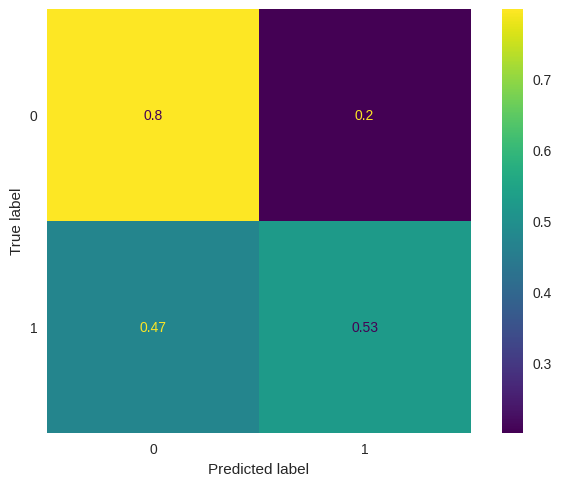

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.48599670510708404
Recall:  0.5258467023172906
F1_score:  0.5051369863013698


## Bonus (Optional)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on training and test data
rf_train_pred = rf_clf.predict(X_train)
rf_test_pred = rf_clf.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Train Results")
print(f"Accuracy: {accuracy_score(y_train, rf_train_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_train, rf_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_train_pred))

print("\nRandom Forest Test Results")
print(f"Accuracy: {accuracy_score(y_test, rf_test_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, rf_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_test_pred))


Random Forest Train Results
Accuracy: 99.86%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922

Confusion Matrix:
[[3610    4]
 [   3 1305]]

Random Forest Test Results
Accuracy: 78.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Confusion Matrix:
[[1391  158]
 [ 293  268]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_clf.fit(X_train, y_train)

# Predict on the training and test data
rf_train_pred = rf_clf.predict(X_train)
rf_test_pred = rf_clf.predict(X_test)

# Evaluate Random Forest model on training data
print("Random Forest Train Results:")
print(f"Accuracy: {accuracy_score(y_train, rf_train_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_train, rf_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_train_pred))

# Evaluate Random Forest model on test data
print("\nRandom Forest Test Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_test_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, rf_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_test_pred))

# Now, let's also evaluate the Decision Tree Classifier performance (using your existing code)
# Evaluate Decision Tree model on training data
print("\nDecision Tree Train Results:")
dt_train_pred = tree_clf.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, dt_train_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_train, dt_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, dt_train_pred))

# Evaluate Decision Tree model on test data
print("\nDecision Tree Test Results:")
dt_test_pred = tree_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, dt_test_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, dt_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_test_pred))


Random Forest Train Results:
Accuracy: 99.86%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922

Confusion Matrix:
[[3610    4]
 [   3 1305]]

Random Forest Test Results:
Accuracy: 78.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Confusion Matrix:
[[1391  158]
 [ 293  268]]

Decision Tree Train Results:
Accuracy: 99.86%
Classification Report:
              precision    recall  f1-score   su

We have applied Random Forest and Decision Tree classifiers on the dataset and evaluated them using different metrics such as accuracy, precision, recall, f1-score, and confusion matrix.

1. Random Forest Model Performance:

Training Accuracy: 99.86%

The model performs extremely well on the training set with near-perfect accuracy, meaning it is able to classify nearly all instances correctly.
Test Accuracy: 78.63%

The test accuracy shows a significant drop compared to training, suggesting overfitting where the model has learned the noise and specific patterns of the training data but does not generalize well to new data.

Precision and Recall for Class 1 (Churned Customers):
Precision: 0.63 (out of all predicted churned customers, 63% were correct)
Recall: 0.48 (out of all actual churned customers, 48% were correctly identified)
F1-Score: 0.54 (the harmonic mean of precision and recall, which is still on the lower side for class 1).


2. Decision Tree Model Performance:

Training Accuracy: 99.86%

Like the Random Forest model, the Decision Tree performs very well on the training set.

Test Accuracy: 72.61%

Similarly, there is a noticeable drop in performance on the test set, indicating overfitting.

Precision and Recall for Class 1 (Churned Customers):
Precision: 0.49 (out of all predicted churned customers, 49% were correct)
Recall: 0.53 (out of all actual churned customers, 53% were correctly identified)
F1-Score: 0.51 (again, a low f1-score for churned customers).

Comparison of the Models:

Accuracy:
Random Forest (78.63%) outperforms Decision Tree (72.61%) on the test set. However, accuracy alone can be misleading, especially in imbalanced datasets.

Precision and Recall:
Random Forest has higher precision (0.63) and recall (0.48) for the churned class (1) compared to Decision Tree (precision 0.49, recall 0.53). Although Decision Tree has a slightly better recall, Random Forest performs better overall when balancing between precision and recall.

F1-Score:
Random Forest also has a higher F1-score (0.54) compared to Decision Tree (0.51), indicating it strikes a better balance between precision and recall.

Confusion Matrix:
Random Forest: The confusion matrix shows that 4 false positives and 3 false negatives were made for churned customers, which is quite low.

Decision Tree: The confusion matrix shows a higher number of false positives (312) and false negatives (266), indicating the Decision Tree model struggles more to correctly classify churned customers.

Which Model to Choose and Why?
Given the comparison above:

Random Forest would be the preferred model because:
It has higher test accuracy (78.63%) than Decision Tree (72.61%).
It demonstrates better precision and recall for predicting churned customers (Class 1).
It provides a better balance between precision and recall with a higher F1-score (0.54 compared to 0.51).
The confusion matrix also shows fewer misclassifications compared to Decision Tree.

Conclusion: Random Forest should be chosen because it better generalizes to the test data and provides a more reliable performance in terms of both precision and recall for churn prediction.






